# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functions

tmax = 1000
L = 500
N = 100
vmax = 5
p = 0.2

# Flow vs density

The time-averaged flow q between i and i+1 is:

$q = \frac{1}{T}\sum_{t=t_0+1}^{t_0+T}n_{i,i+1}(t)$

The density p on a fixed site i averaged over a time period T:

$p = \frac{1}{T}\sum_{t=t_0+1}^{t_0+T}n_{i}(t)$

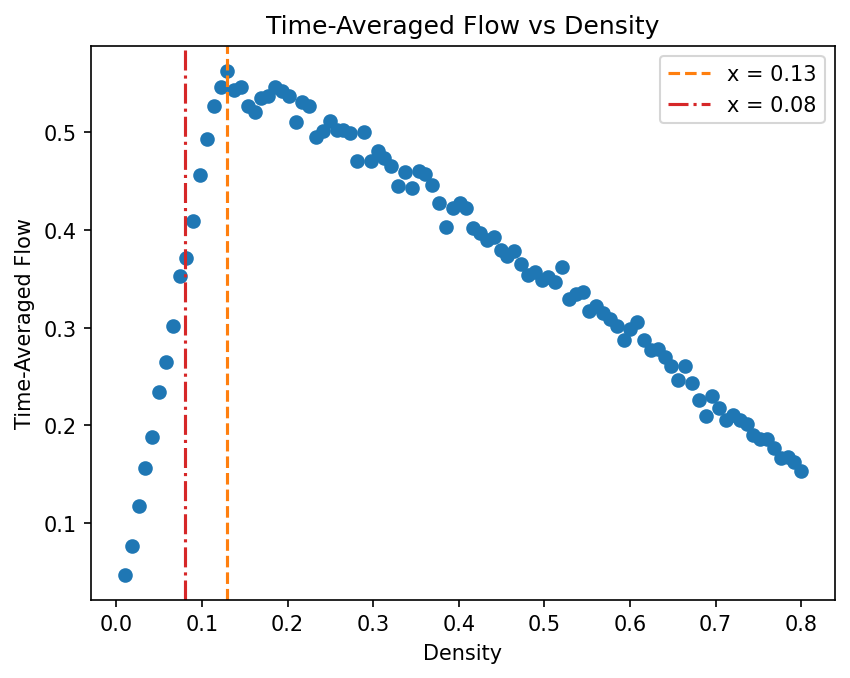

In [2]:
# Evenly spaced density values
densities = np.linspace(0.01, 0.8, 100)

flow_vs_density = []

for density in densities:
    simulation = functions.Nagel_Schreckenberg(L, int(density * L), vmax, p, tmax)
    simulation.run_model()
    single_cell_flow = simulation.flow()
    
    final_single_cell_flow = single_cell_flow/tmax

    flow_vs_density.append(final_single_cell_flow)


for i in range(len(densities)):
    # Calculate the rate of change of velocity for each density
    rate_of_change = np.diff(flow_vs_density) / np.diff(densities)

    # Find the indexes where the rate of change starts decreasing
    optimal_index = np.argmax(rate_of_change < 0)

    # Find the max velocity that corresponds to this index
    optimal_density = densities[optimal_index]

# Plotting
plt.figure(dpi = 150)
plt.scatter(densities, flow_vs_density)
plt.xlabel('Density')
plt.ylabel('Time-Averaged Flow')
plt.title('Time-Averaged Flow vs Density')
plt.axvline(x = optimal_density,  color = 'tab:orange', linestyle = '--', label = f'x = {round(optimal_density, 2)}')
plt.axvline(x = 0.08, color = 'tab:red', linestyle = '-.', label = 'x = 0.08')
plt.legend()
plt.show()

# Cluster distribution 

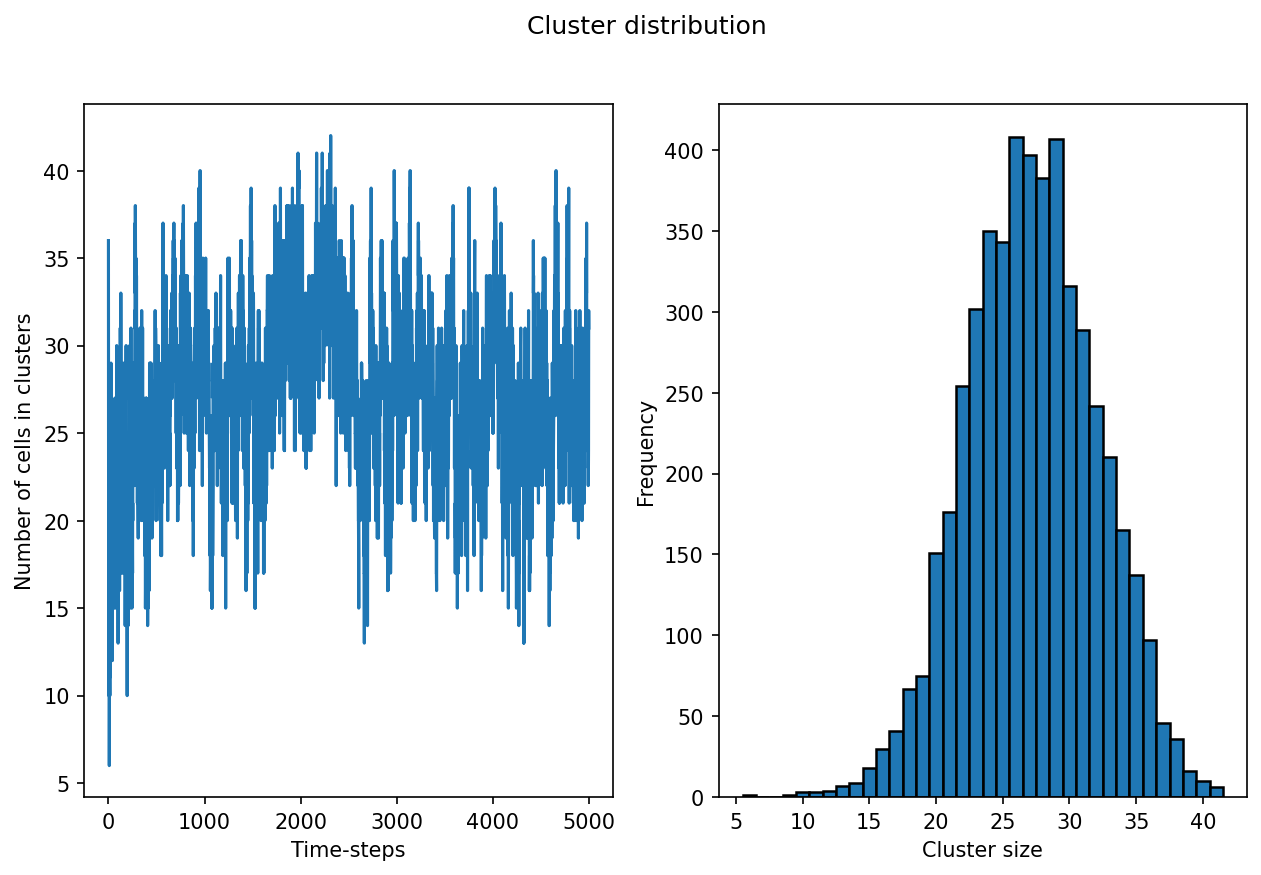

In [3]:
simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, 5000)
simulation.run_model()
cluster_distribution = simulation.clusters()[0]

x = np.arange(min(cluster_distribution), max(cluster_distribution))

# Plotting
fig, axs = plt.subplots(1,2, dpi=150, figsize = (10,6))
axs[0].plot(range(5000), cluster_distribution)
axs[0].set_xlabel('Time-steps')
axs[0].set_ylabel('Number of cells in clusters')
axs[1].hist(cluster_distribution, bins = len(x), align = 'left', edgecolor = 'black', linewidth = 1.2)
axs[1].set_xlabel('Cluster size')
axs[1].set_ylabel('Frequency')
plt.suptitle('Cluster distribution')
plt.show()

# Percentage of cells in clusters for different densities

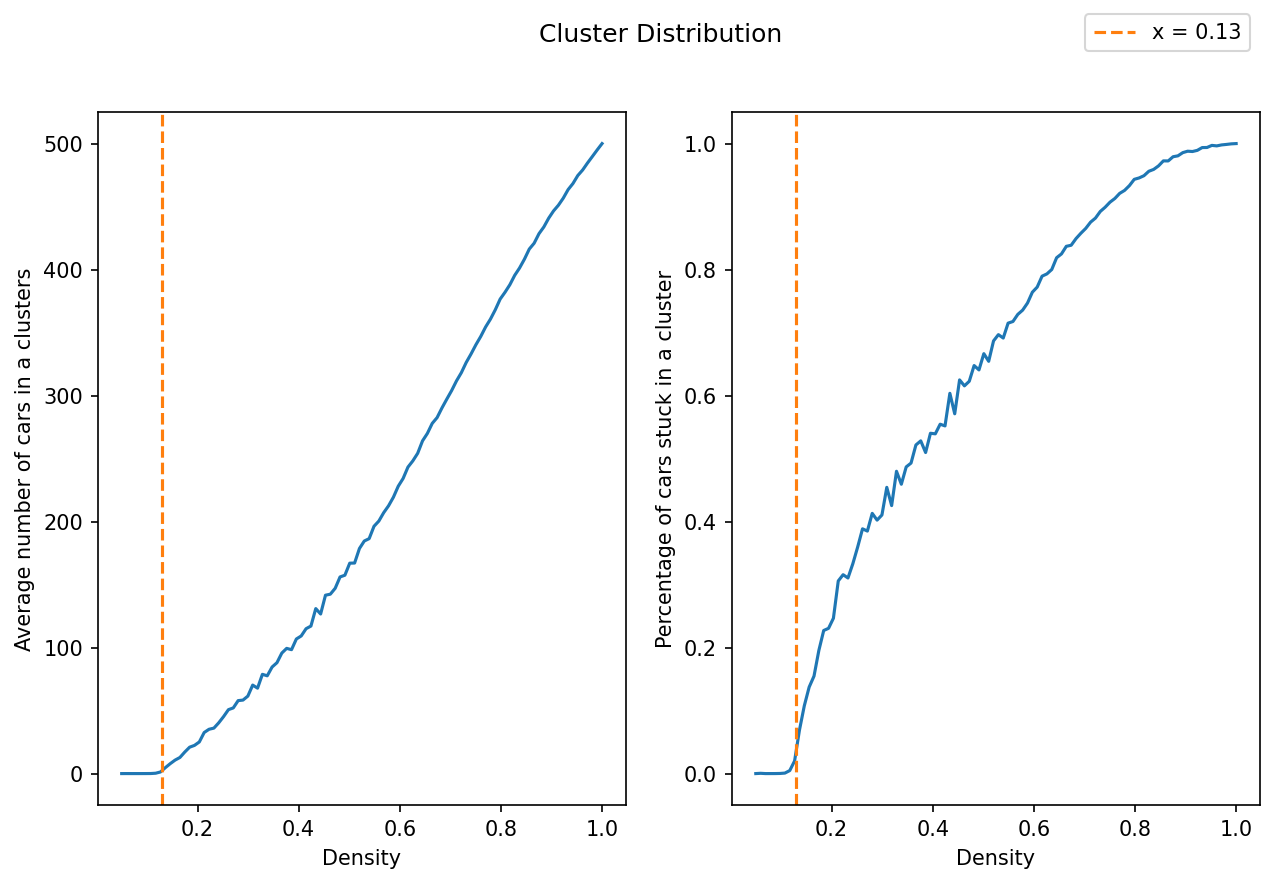

In [21]:
densities = np.linspace(0.05, 1, 100)

cluster_averages = []
percent_average = []

for density in densities:
    simulation = functions.Nagel_Schreckenberg(L, int(L * density), vmax, p, tmax)
    simulation.run_model()
    cluster_list = simulation.clusters()[0]
    cluster_average = np.mean(cluster_list)
    cluster_averages.append(cluster_average)
    percent_average.append(cluster_average/(density*L))
    

# Plotting
fig, axs = plt.subplots(1,2, dpi=150, figsize = (10,6))
axs[0].plot(densities, cluster_averages)
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Average number of cars in a clusters')
axs[0].axvline(x = optimal_density,  color = 'tab:orange', linestyle = '--', label = f'x = {round(optimal_density, 2)}')
axs[1].plot(densities, percent_average)
axs[1].set_xlabel('Density')
axs[1].set_ylabel('Percentage of cars stuck in a cluster')
axs[1].axvline(x = optimal_density,  color = 'tab:orange', linestyle = '--')
plt.suptitle('Cluster Distribution')
fig.legend(bbox_to_anchor = (0.9, 1))
plt.show()

In [5]:
'''
Not using for presentation
'''


# # Parameters
# L = 5000
# N = 10
# v_max = 5
# p = 0.8
# t_max = 1000

# densities = np.linspace(0.02, 0.2, 100)

# cluster_averages = []

# for density in densities:
#     simulation = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max, seed = 2024)
#     simulation.run_model()
#     cluster_list = simulation.clusters()[0]
#     cluster_average = np.mean(cluster_list)
#     cluster_averages.append(cluster_average)

# # Plotting
# plt.plot(densities, cluster_averages)
# plt.xlabel('Density')
# plt.ylabel('Average number of cells in clusters')
# plt.title('Average cells in cluster vs Density')
# plt.show()


'\nNot using for presentation\n'

# Cluster number and size

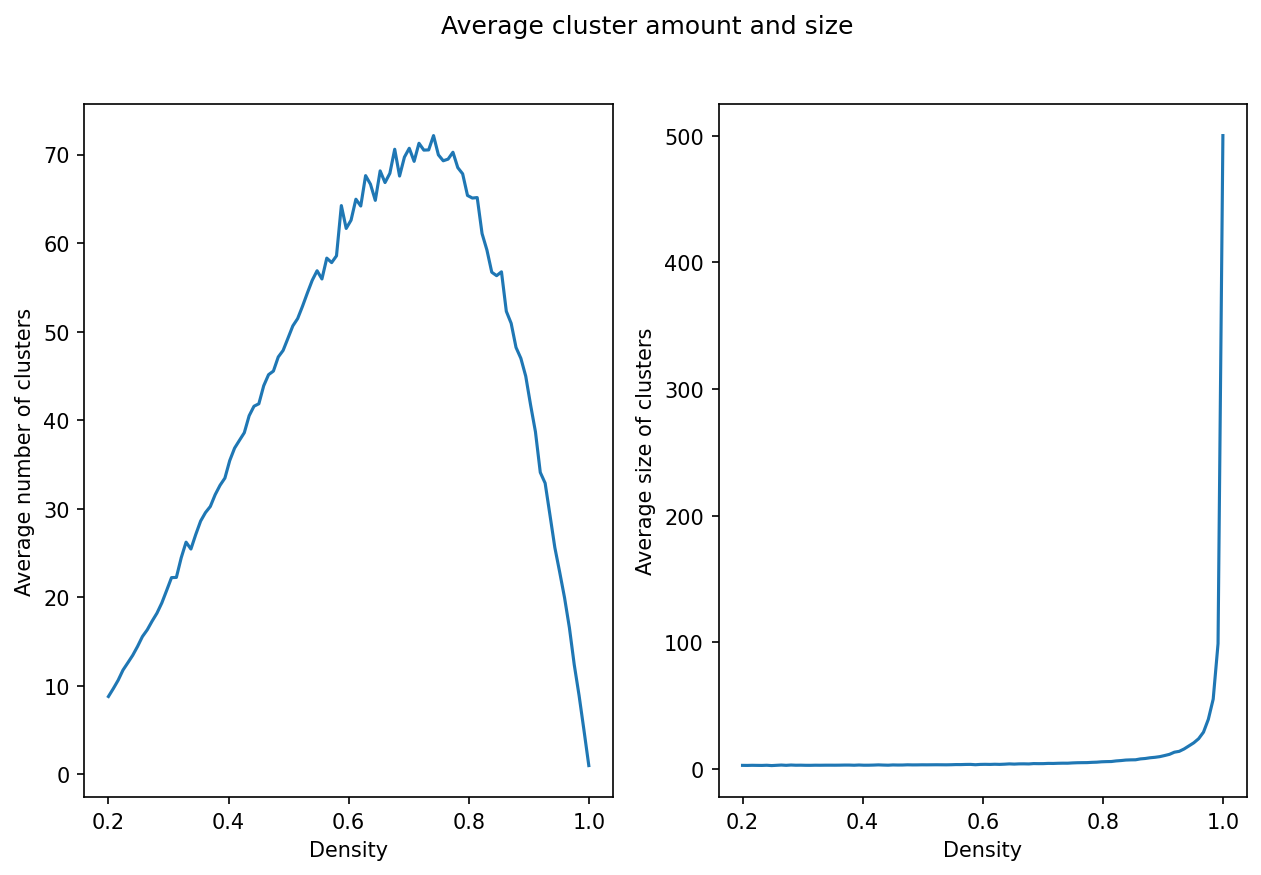

In [7]:
densities = np.linspace(0.2, 1, 100)

average_cells_in_clusters_per_density = []
average_number_clusters_per_density = []
average_cluster_sizes = []


for density in densities:

    simulation = functions.Nagel_Schreckenberg(L, int(L * density), vmax, p, tmax)
    simulation.run_model()
    cells_cluster_list = simulation.clusters()[0]
    cluster_count_list = simulation.clusters()[1]
    
    # Cells calculations
    cells_cluster_average = np.mean(cells_cluster_list)
    average_cells_in_clusters_per_density.append(cells_cluster_average)

    # Cluster calculations
    cluster_count_average = np.mean(cluster_count_list)
    average_number_clusters_per_density.append(cluster_count_average)

    # Cluster size calculations
    average_cluster_size = cells_cluster_average/cluster_count_average if cluster_count_average != 0 else 0
    average_cluster_sizes.append(average_cluster_size)


# Plotting two graphs: number of cells in clusters and number of clusters
fig, axs = plt.subplots(1,2, dpi=150, figsize = (10,6))
axs[0].plot(densities, average_number_clusters_per_density)
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Average number of clusters')
axs[1].plot(densities, average_cluster_sizes)
axs[1].set_xlabel('Density')
axs[1].set_ylabel('Average size of clusters')
plt.suptitle('Average cluster amount and size')
plt.show()